In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [9]:
path = r"C:\Users\matth\Documents\GitHub\Week_5\5_Lab_1\data\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path)

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [53]:
cat_frequency = pd.crosstab(df['category'], columns = 'count').sort_values(by = 'count', ascending = False).reset_index()
cat_frequency

col_0,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Motorbike Chassis,107
292,Plugs,107
293,Alexa Built-In Devices,107
294,Smart Home Security & Lighting,104


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [86]:
filtered_cat = cat_frequency.loc[cat_frequency['count']> 10000]

In [100]:
len(filtered_cat)

23

<Axes: xlabel='count', ylabel='category'>

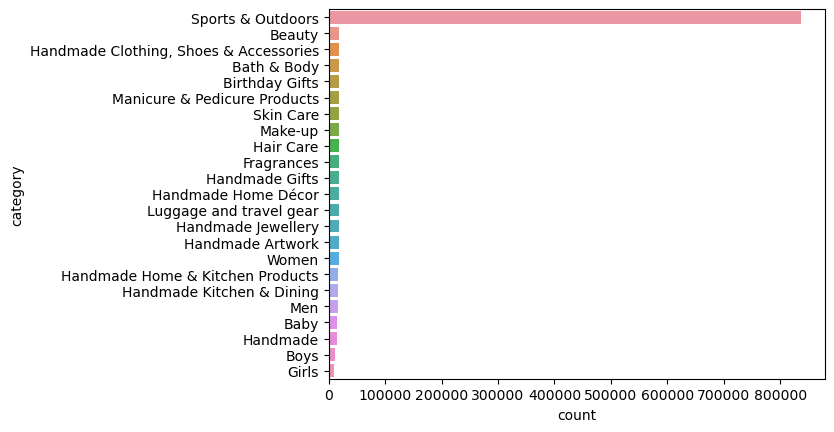

In [88]:
sns.barplot(data = filtered_cat, x = 'count', y = 'category')

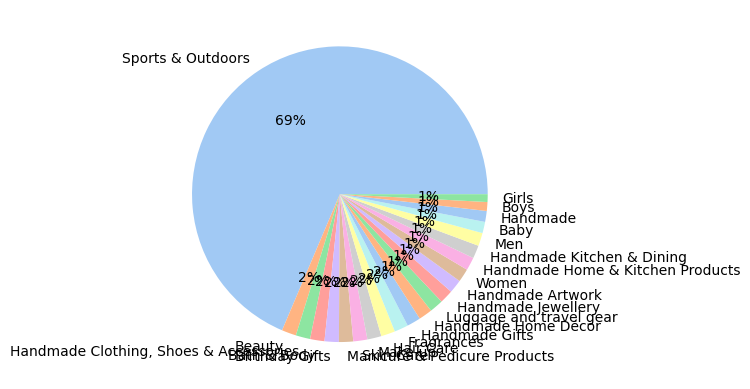

In [104]:
colours = sns.color_palette('pastel')[0:23]
labels = list(filtered_cat['category'])

#create pie chart
plt.pie(filtered_cat['count'], labels = labels, colors = colours, autopct='%.0f%%')
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [111]:
mean_price = df['price'].mean()
median_price = df['price'].quantile(0.5)
mode_price = df['price'].mode()[0]
mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [116]:
var_price = df['price'].var()
std_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)
var_price, std_price, range_price, iqr_price

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

C:\Users\matth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='price'>

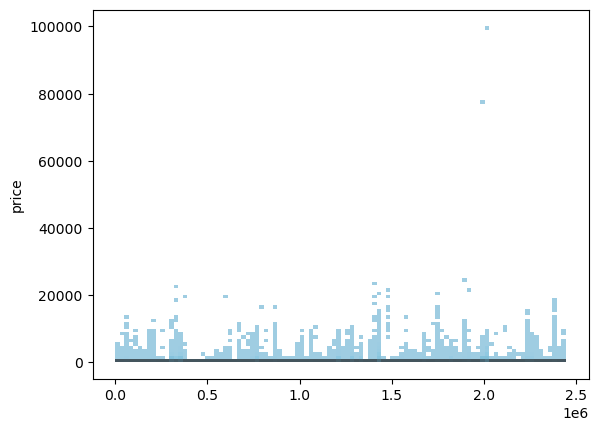

In [137]:
sns.histplot(data = df, y = 'price', x = df.index, bins = 100, kde = True, color = 'skyblue')

<Axes: xlabel='price'>

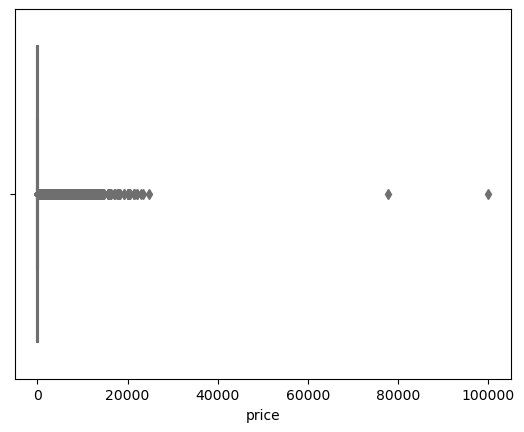

In [140]:
sns.boxplot(data = df, x = 'price', color = 'skyblue')

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [146]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].quantile(0.5)
mode_rating = df['stars'].mode()[0]
mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [149]:
var_rating = df['stars'].var()
std_rating = df['stars'].std()
range_rating = df['stars'].max() - df['stars'].min()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
var_rating, std_rating, range_rating, iqr_rating

(4.81743402976196, 2.1948653785054697, 5.0, 4.4)

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [155]:
skew_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()
skew_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

C:\Users\matth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

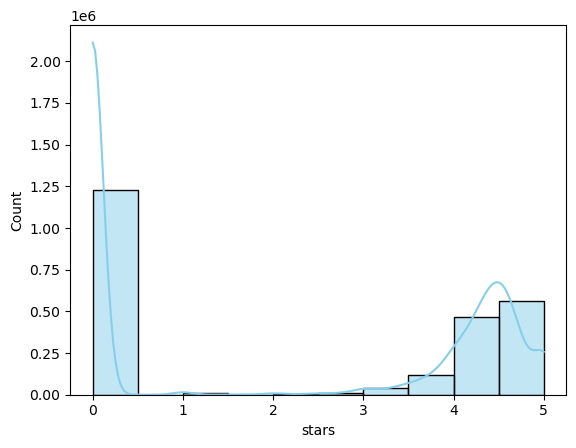

In [167]:
sns.histplot(data = df, x = 'stars', bins = 10, kde = True, color = 'skyblue')